In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import io
from skimage import measure, color, segmentation, morphology, filters

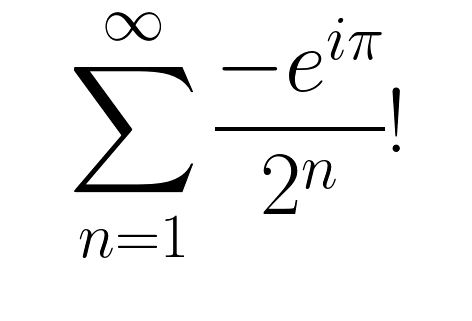

In [3]:
# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height
filename = 'eq.png'

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

#txt = 'middle'
txt = r"$\displaystyle\sum_{n=1}^\infty\frac{-e^{i\pi}}{2^n}$!"

ax.text(0.5*(left+right), 0.5*(bottom+top), txt,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=90, color='black',
        transform=ax.transAxes)

ax.set_axis_off()
plt.savefig(filename)
plt.show()

16
(1, 78, 30, 134)
(7, 311, 12, 316)
(20, 301, 49, 317)
(21, 322, 49, 355)
(40, 262, 81, 295)
(56, 47, 181, 166)
(56, 196, 60, 250)
(77, 366, 125, 373)
(116, 188, 120, 358)
(134, 366, 141, 373)
(143, 237, 203, 270)
(149, 276, 178, 309)
(205, 138, 246, 157)
(218, 53, 247, 86)
(224, 91, 226, 130)
(235, 91, 237, 130)


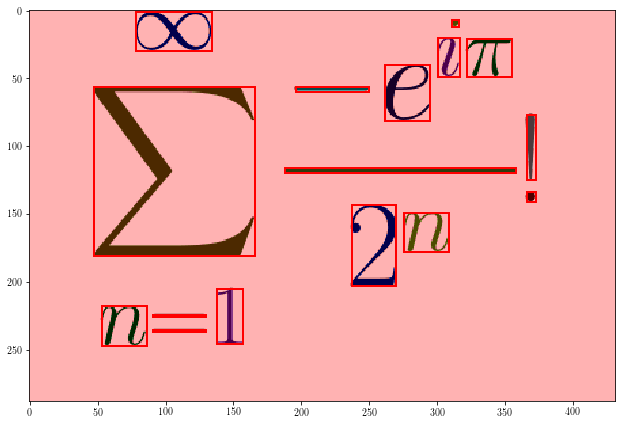

In [9]:
im = color.rgb2grey(io.imread(filename))
thresh = filters.threshold_otsu(im)
blobs = im > thresh
#cleared = segmentation.clear_border(blobs)
#blobs_labels = measure.label(blobs, background=0)
blobs_labels,num = measure.label(blobs, return_num=True, background=1)
print(num)

imoverlay = color.label2rgb(blobs_labels, image=im)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(imoverlay)

for region in measure.regionprops(blobs_labels):
    print(region.bbox)
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    
plt.tight_layout()
plt.show()


(1, 78, 30, 134)


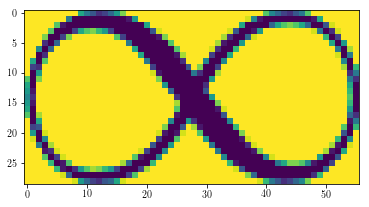

(7, 311, 12, 316)


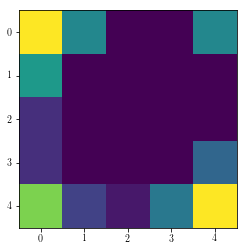

(20, 301, 49, 317)


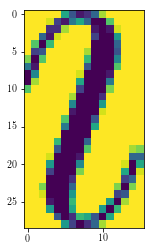

(21, 322, 49, 355)


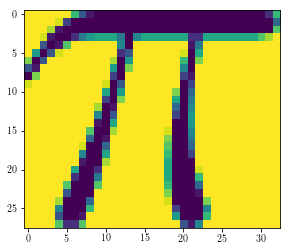

(40, 262, 81, 295)


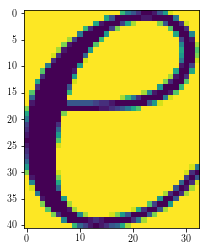

(56, 47, 181, 166)


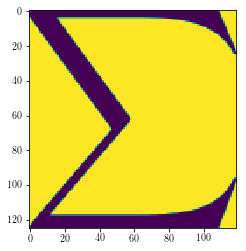

(56, 196, 60, 250)


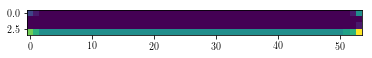

(77, 366, 125, 373)


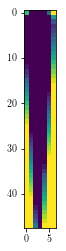

(116, 188, 120, 358)


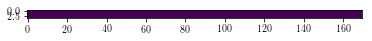

(134, 366, 141, 373)


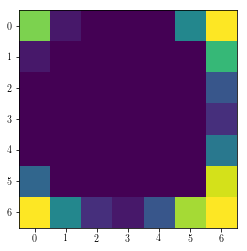

(143, 237, 203, 270)


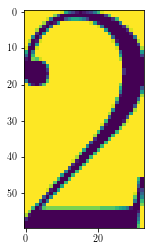

(149, 276, 178, 309)


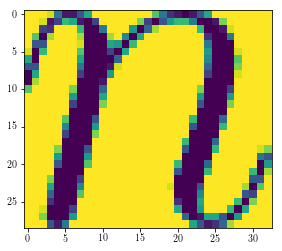

(205, 138, 246, 157)


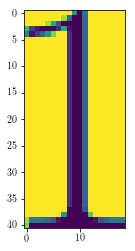

(218, 53, 247, 86)


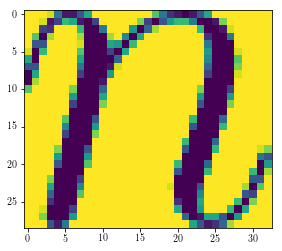

(224, 91, 226, 130)


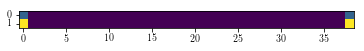

(235, 91, 237, 130)


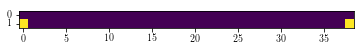

In [11]:
#blobs_labels
for region in measure.regionprops(blobs_labels):
    print(region.bbox)
    minr, minc, maxr, maxc = region.bbox
    subim = im[minr:maxr,minc:maxc]
    plt.imshow(subim)
    plt.show()